# Report

## Introduction and data

### Introduction

Diabetic retinopathy is a serious illness, which is expected to affect > 200 million people by the year 2025 [1]. It is an eye desease resulting in blindness for over 10000 people with diabetes per year [2]. In order to help these patients Boehringer Ingelheim is investing in Research and Development of biopharmaceuticals and is screening for new active ingredients, which has the potential to slow or even stop the progression of this desease [3]. A unique characteristic of these medications is the intravitreal application, which means that the drug product is injected directly into the vitreous humor, the gel-like substance inside the eye (see picture below).

<img src="../references/images/IntravitrealApplication.png" alt="Beispielbild" width="400">


*Picture: Illustration of the ocular anatomy and intravitreal injection for the treatment of ocular diseases [4]*



One major challenge of developing drug products, which are applied intravitreal, is the requirement for the low viscosity of the drug product solution. Viscosity is the measure of how easily a fluid flows; thicker liquids like honey have high viscosity, while thinner ones like water have low viscosity. It reflects the internal resistance of a liquid's molecules to movement or flow. A high viscosity of the drug product solution in the syringe results in a higher injection force necessary to apply the medication into the eye. The European Pharmacopoeia (EP) provides specific guidelines regarding the viscosity of intravitreal applied biopharmaceuticals to ensure safe and effective injection [5]. 

For this reason the viscosity is a very important measure and is determined several times during the early development stage for every new product. Viscosity is tested under different experiment conditions like temperature and product concentration. In order to reduce development time to the commercial launch of a new drug product and reduce costs for laboratory equipment and personnel, the long term motivation of this work is to predict the viscosity of every new agent without any experiments in the laboratory.

### Data description

The data set, which will be explored in this work consists of viscosity data, whereas each observation of the data set corresponds to one measurement value. The data was collected as part of a characterization study for various biopharmaceutical products. These products consist of different types of proteins (IgG2, IgG4, Knob/Hole, DoppelMab), which have different characteristics like molecular weight, isoelectic point or extinction coefficient. In order to determine the effect of product concentration on the viscosity, each product was measured at two different concentrations (10 mg/mL, 62.5 mg/mL).  Furthermore, viscosity was measured at different temperatures (2°C - 40°C) to assess the impact of temperature variations. The data set consists of the following variables:



| Name  |   Description	| Role   	| Type   	|  Format 	|
|-------|---------------|-----------|-----------|-----------|
| viscosity_mPas  	| Measured viscosity, of the sample in mPas 	        | response  	    | numeric  	    | float  	|
| replicate  	| Number of replicate. Within each measurement, two individual measurements were conducted as technical replicates   	        | ID 	    | numeric  	    | int  	|
| entered_on  	| The date on which the measurement was conducted	        | predictor  	    |numeric  	    | date  	|
| instrument  	| Instrument, which was used to measure the viscosity   	        | predictor  	    | nominal  	    | category  	|
| temperature_c 	| The temperature at which the measurement was conducted  	        | predictor  	    | numeric  	    | float  	|
| product_concentration_mg_mL  	| Concentration of the product in the aqueous solution in mg/mL   	        | predictor  	    | numeric  	    | float  	|
| product  	| Internal product name as a unique code  	        | ID  	    | nominal  	    | category  	|
| protein_format  	| Protein format of the investigated product 	        | predictor  	    | nominal  	    | category  	|
| molecular_weight_kda  	| Molecular weight of the investigated product in kDa. A measure of the size of the protein   	        | predictor  	    | numeric  	    | float  	|
| extinction_coefficient_l_molcm  	| Extinction coefficient of the investigated product in L·mol⁻¹·cm⁻¹. A measure of the light absorption ability of the molecule 	        | predictor  	    | numeric  	    | float  	|
| isoelectric_point  	| Isoelectric point of the investigated product. A measure of the charge of the molecule	        | predictor  	    | numeric  	    | float  	|

This study investigates the influence of various experimental conditions on the measured viscosity of the drug product. Based on existing literature, temperature, product concentration, and molecular weight are identified as potential predictors that likely affect the response variable. To enable further analysis, the relationships between these explanatory variables and the viscosity will first be explored before fitting a predictive model. Additionally, the impact of other explanatory variables, such as protein format, extinction coefficient, and isoelectric point, on the model's predictive power will also be assessed.


### Data collection

The underlying measurements were conducted by laboratory personnel within the formulation development department at Boehringer Ingelheim. The measurement values were documented in the internal Laboratory Information Management System (LIMS) along with additional detailed experimental and contextual information, which also contain all explanatory data like the product characteristics etc. The data is stored in an Oracle SQL database and was extracted using targeted SQL queries. 

Since the data used contain confidential information of Boehringer Ingelheim, they have been modified to protect sensitive details. Some variables have been anonymized or altered in their structure without compromising the relevance of the data for the analysis.

### Setup

In [685]:
import pickle
import os
from datetime import datetime
import subprocess
from pathlib import Path
import seaborn as sns  
import matplotlib.pyplot as plt

import pandas as pd
import altair as alt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

### import Data

In [686]:
# Import data from the csv-file "viscosity_data.csv"
df = pd.read_csv("../data/processed/viscosity_data.csv", sep=";")

### Data structure

In [687]:
df.head()

,viscosity_mPas,replicate,entered_on,instrument,temperature,product_concentration_mg_mL,product,protein_format,molecular_weight_kDa,extinction_coefficient_L_molcm,isoelectric_point
0,3.93,1,15.03.2019,VISCOSIMETER_02,2,10.0,BI655300,IgG2,148830,220.42,8.54
1,4.28,2,16.03.2019,VISCOSIMETER_02,2,10.0,BI655300,IgG2,148830,220.42,8.54
2,3.42,1,15.03.2019,VISCOSIMETER_02,5,10.0,BI655300,IgG2,148830,220.42,8.54
3,3.69,2,15.03.2019,VISCOSIMETER_02,5,10.0,BI655300,IgG2,148830,220.42,8.54
4,2.89,1,15.03.2019,VISCOSIMETER_02,10,10.0,BI655300,IgG2,148830,220.42,8.54


In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   viscosity_mPas                  502 non-null    float64
 1   replicate                       502 non-null    int64  
 2   entered_on                      502 non-null    object 
 3   instrument                      502 non-null    object 
 4   temperature                     502 non-null    int64  
 5   product_concentration_mg_mL     502 non-null    float64
 6   product                         502 non-null    object 
 7   protein_format                  502 non-null    object 
 8   molecular_weight_kDa            502 non-null    int64  
 9   extinction_coefficient_L_molcm  502 non-null    float64
 10  isoelectric_point               502 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 43.3+ KB


In [689]:
#Search for empty data fields
print(df.isnull().sum())

viscosity_mPas                    0
replicate                         0
entered_on                        0
instrument                        0
temperature                       0
product_concentration_mg_mL       0
product                           0
protein_format                    0
molecular_weight_kDa              0
extinction_coefficient_L_molcm    0
isoelectric_point                 0
dtype: int64


### Data corrections

According to the literature there are three explanatory variables, which have an impact on the viscosity of the solution. According to the Arrhenius equation, a higher temperature generally decreases viscosity, because molecular movement increases, reducing intermolecular interactions [6]. Also the product concentration might have an impact on the viscosity, because molecules in solution interact more frequently, leading to increased resistance to flow [7] Additionally larger and more complex proteins, such as aggregates or conjugated proteins, tend to increase solution viscosity due to their size and interaction with other molecules in the solution [8], which indicates that the moleculare weight of the product might have an impact on the measured viscosity. According to literature the relationship of all three explanatory variables and the target variable is exponentell. In order to use the linear regression the Log Transformation is used. Therefore the target variable 'viscosity_mpas' is normalized by calculating the base-10 logarithm of the variable (log_viscosity).

In [690]:
# change data type in order to make pandas functions more efficient
df['protein_format'] = pd.Categorical(df['protein_format'])

In [691]:
# Make sure column names are lower case and eliminate spaces
df.columns = df.columns.str.lower()

In [692]:
# Log-transformation of the target variable (without unit)
df['log_viscosity'] = np.log(df['viscosity_mpas'])

In [693]:
# For a better overview data set is reduced to the most interesting variables we want to examine
df = df.loc[0:502,['viscosity_mpas','protein_format','log_viscosity','temperature','product_concentration_mg_ml','molecular_weight_kda','extinction_coefficient_l_molcm','isoelectric_point']]

### Descriptive statistics

In [694]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
viscosity_mpas,502.0,3.894861,2.990443,0.540000,2.200000,3.165000,4.547500,27.870000
log_viscosity,502.0,1.173634,0.580932,-0.616186,0.788457,1.152152,1.514577,3.327551
temperature,502.0,20.203187,12.610650,2.000000,10.000000,20.000000,30.000000,40.000000
product_concentration_mg_ml,502.0,36.354582,26.275976,10.000000,10.000000,62.500000,62.500000,62.500000
molecular_weight_kda,502.0,161211.103586,22382.413980,146286.000000,148783.000000,149601.000000,155089.000000,206428.000000
extinction_coefficient_l_molcm,502.0,241.135538,50.327715,201.400000,207.360000,220.420000,236.920000,355.710000
isoelectric_point,502.0,8.094382,0.580659,6.970000,7.750000,8.270000,8.420000,9.360000


The predictor variables exhibit significant differences in scale. To enable a meaningful comparison of their influence on the target variable, standardizing all features may enhance the model's performance.

### Exploratory data analysis

In order to visualize the relationship between the explanatory variables and the response variable, charts were created with the training data. According to literature a linear correlation of all three parameters (temperature, product concentration, molecular weight) and the logarithm of the viscosity is expected. Although all three predictor variables take continuous numerical values, the dataset contains only a specific number of defined values for the independent variables. There exist only nine values of the temperature (2°C, 5°C, 10°C, 15°C, 20°C, 25°C, 30°C, 35°C, 40°C), two values of the product concentration (10 mg/mL, 62.5 mg/mL) and 14 values of the molecular weight. Therefore box plots were chosen to visualize the distribution of the response variable within these values of the predictor variables.

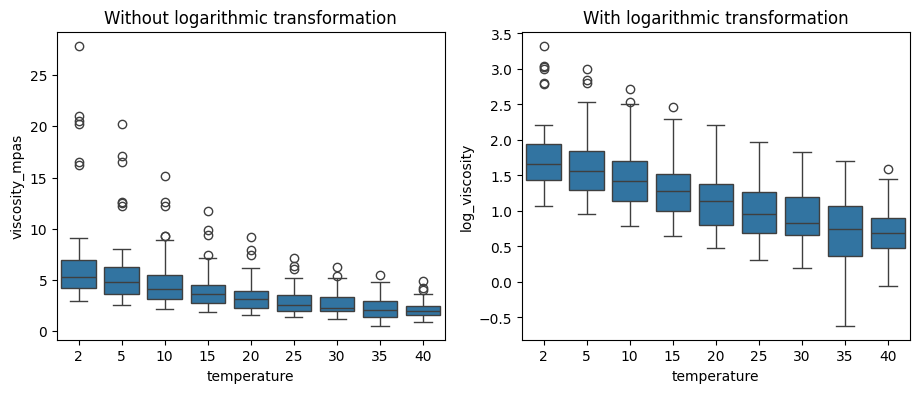

In [695]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))  

sns.boxplot(data=df, x='temperature', y='viscosity_mpas', ax=axes[0])
axes[0].set_title("Without logarithmic transformation")

sns.boxplot(data=df, x='temperature', y='log_viscosity', ax=axes[1])
axes[1].set_title("With logarithmic transformation")

plt.show()

In the left box plot, the relationship between the measured viscosity in mPas and the temperature in °C is shown without log transformation of the response variable. A slightly negative trend is evident from the individual data points. As temperature increases, the measured viscosity decreases, indicating a negative association between the two variables. The high number of outliers above the whiskers and the longer upper whiskers indicate a right-skewed disctibution. The pattern of the data points suggests an exponential relationship between the two variables. These findings are consistent with the literature, which states that the viscosity of a fluid decreases exponentially as temperature rises [6].

In order to get a more symmetric distribution, reduce the impact of outliers and get a linear relationship a logarithmic transformation was done, which is shown in the right box plot. In this chart the relationship beween the base-10 logarithm of the viscosity (log_viscosity) and the temperature is shown. Although there are still outliers in the graph above the boxes, the distribution of the response variable appears to be more symmetric. The lengths of the lower and upper whiskers in the box plots have become more balanced and the chart suggests a moderate linear correlation between the two variables. 

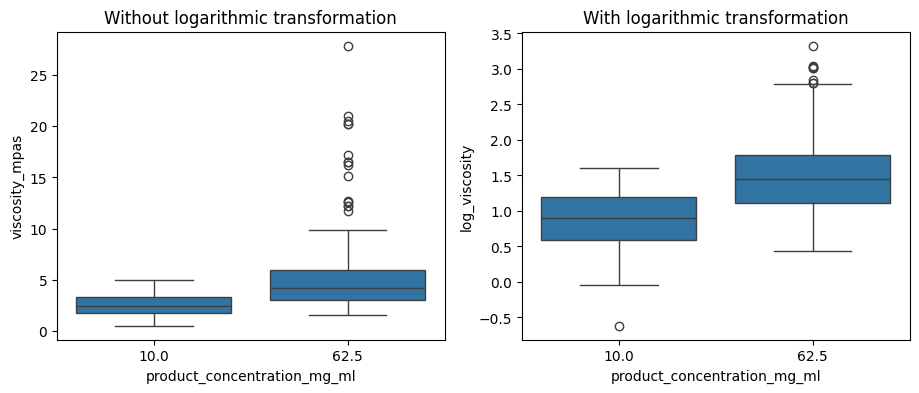

In [696]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))  

sns.boxplot(data=df, x='product_concentration_mg_ml', y='viscosity_mpas', ax=axes[0])
axes[0].set_title("Without logarithmic transformation")

sns.boxplot(data=df, x='product_concentration_mg_ml', y='log_viscosity', ax=axes[1])
axes[1].set_title("With logarithmic transformation")

plt.show()

The left graph illustrates the relationship between measured viscosity (in mPas) and product concentration (in mg/mL). The presence of numerous outliers and the longer upper whiskers indicate a right-skewed distribution, similar to the graphs above.

The right graph shows the relationship between the base-10 logarithm of viscosity (log_viscosity) and product concentration (in mg/mL). Although only two concentration levels (10 mg/mL and 62.5 mg/mL) were analyzed, a clear positive correlation between the logarithm of viscosity and product concentration is observed. The median positions within the boxes suggest that the distribution of the response variable is more symmetric compared to the left graph (without normalization). This increased symmetry indicates that the relationship between product concentration and logarithmically transformed viscosity is linear, whereas the relationship with the untransformed viscosity follows an exponential pattern. These findings are consistent with the literature, which reports that the viscosity of protein solutions increases exponentially with rising protein concentration [7].

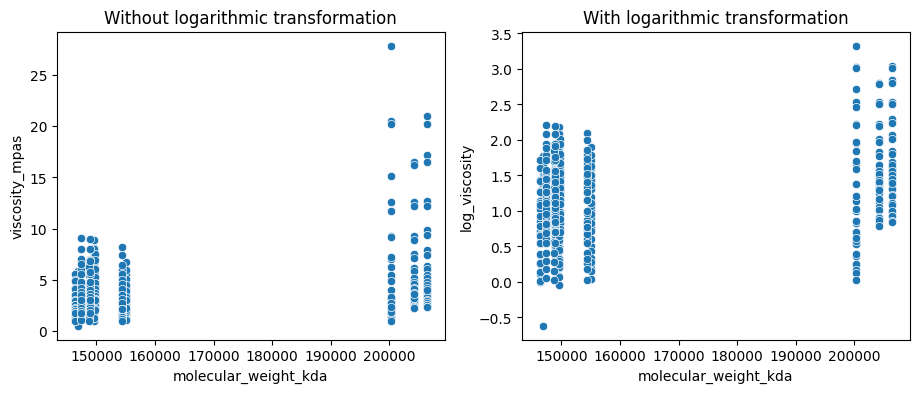

In [697]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))  

sns.scatterplot(data=df, x='molecular_weight_kda', y='viscosity_mpas', ax=axes[0])
axes[0].set_title("Without logarithmic transformation")

sns.scatterplot(data=df, x='molecular_weight_kda', y='log_viscosity', ax=axes[1])
axes[1].set_title("With logarithmic transformation")

plt.show()

The left graph illustrates the relationship between measured viscosity (in mPas) and the molecular weight (in mg/mL). To achieve a continuous distribution of the data points along the x-axis, a scatter plot was chosen for visualization instead of a box plot. Nevertheless a right-skewed distribution especially at higher molecular weight is observed.

In the right graph the distriubution seems to be more symmatrical. In this graph the relationship between the logarithm of the measured viscosity (in mPas) and the molecular weight (in kDa) of the product is shown. Despite the dataset containing 14 different molecular weights, the predictor variable is not evenly distributed along the x-axis. The graph reveals that the molecular weights can be grouped into two main clusters: a smaller cluster between 140,000 kDa and 160,000 kDa, and a larger cluster between 200,000 kDa and 210,000 kDa. The logarithmically transformed viscosity of the heavier molecules appears to be higher than that of the smaller molecules, suggesting a positive association between molecular weight and logarithmically transformed viscosity. 

Besides the numerical predictors there is also a categorical variable, which might have an impact on the response variable. The protein format is the type of protein, which was examined during the measurements. This attribute consists of four different categories: IgG2, IgG4, Knob/Hole, DoppelMab. Before including this variable in the model development, the distribution of the data within the data set is determined:

In [698]:
counts = df['protein_format'].value_counts()
counts

protein_format
IgG2         250
DoppelMab    108
IgG4          72
Knob/Hole     72
Name: count, dtype: int64

The variable protein_format contain a good distribution of data, which might be helpful to improve the model's accuracy. In the following chart the relationship between the protein format and the response variable will be visualized. To show the distribution of the data within the four categories boxplots were chosen.

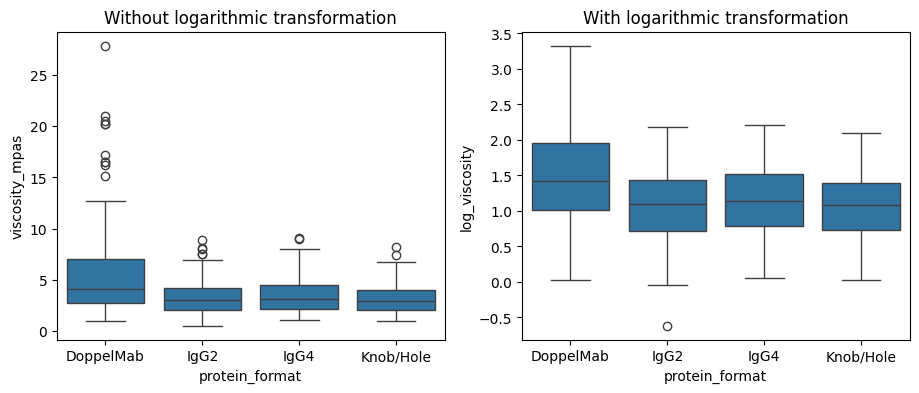

In [699]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))  

sns.boxplot(data=df, x='protein_format', y='viscosity_mpas', ax=axes[0])
axes[0].set_title("Without logarithmic transformation")

sns.boxplot(data=df, x='protein_format', y='log_viscosity', ax=axes[1])
axes[1].set_title("With logarithmic transformation")

plt.show()

In the left graph the distribution of the viscosity values in mPas within the four categories of the protein format variable were shown. Like in the graphs with the numerical variables above a right skewed distribution is visible. The distribution in the right box plot (logarithmically transformed viscosity) seems to be more symmetrically

These variables can be transformed to numerical variables using the function pd.get_dummies:

In [700]:
df = pd.get_dummies(df, columns=['protein_format'], drop_first= True)
#new columns were convert into integer data types
df['protein_format_IgG2'] = df['protein_format_IgG2'].astype(int)
df['protein_format_IgG4'] = df['protein_format_IgG4'].astype(int)
df['protein_format_Knob/Hole'] = df['protein_format_Knob/Hole'].astype(int)
#df['protein_format_DoppelMab'] = df['protein_format_DoppelMab'].astype(int)

In [701]:
df.head()

,viscosity_mpas,log_viscosity,temperature,product_concentration_mg_ml,molecular_weight_kda,extinction_coefficient_l_molcm,isoelectric_point,protein_format_IgG2,protein_format_IgG4,protein_format_Knob/Hole
0,3.93,1.368639,2,10.0,148830,220.42,8.54,1,0,0
1,4.28,1.453953,2,10.0,148830,220.42,8.54,1,0,0
2,3.42,1.229641,5,10.0,148830,220.42,8.54,1,0,0
3,3.69,1.305626,5,10.0,148830,220.42,8.54,1,0,0
4,2.89,1.061257,10,10.0,148830,220.42,8.54,1,0,0


## Methodology

The chart below is a correlation matrix, which is a tabular representation of the pairwise correlation coefficients between all numerical variables in the dataset, including the predictors, the target variable and the logarithmic transformed target variable. The correlation matrix indicates the strength and direction of the linear relationship between two variables, which will be helpful to discuss possible variable transformations or to identify multicollinearity.

In [702]:
corr = df.corr(method='pearson').round(2)
corr_blues = corr.style.background_gradient(cmap='Blues', axis=None, gmap=corr.abs())
corr_blues

,viscosity_mpas,log_viscosity,temperature,product_concentration_mg_ml,molecular_weight_kda,extinction_coefficient_l_molcm,isoelectric_point,protein_format_IgG2,protein_format_IgG4,protein_format_Knob/Hole
viscosity_mpas,1.000000,0.880000,-0.500000,0.430000,0.360000,0.350000,-0.160000,-0.210000,-0.030000,-0.090000
log_viscosity,0.880000,1.000000,-0.630000,0.520000,0.310000,0.290000,-0.190000,-0.190000,0.000000,-0.090000
temperature,-0.500000,-0.630000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
product_concentration_mg_ml,0.430000,0.520000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
molecular_weight_kda,0.360000,0.310000,0.000000,-0.000000,1.000000,0.980000,-0.320000,-0.570000,-0.240000,-0.120000
extinction_coefficient_l_molcm,0.350000,0.290000,0.000000,-0.000000,0.980000,1.000000,-0.190000,-0.590000,-0.250000,-0.040000
isoelectric_point,-0.160000,-0.190000,0.000000,-0.000000,-0.320000,-0.190000,1.000000,0.280000,-0.480000,0.510000
protein_format_IgG2,-0.210000,-0.190000,-0.000000,0.000000,-0.570000,-0.590000,0.280000,1.000000,-0.410000,-0.410000
protein_format_IgG4,-0.030000,0.000000,0.000000,-0.000000,-0.240000,-0.250000,-0.480000,-0.410000,1.000000,-0.170000
protein_format_Knob/Hole,-0.090000,-0.090000,0.000000,-0.000000,-0.120000,-0.040000,0.510000,-0.410000,-0.170000,1.000000


### Logarithmic Transformation

Like shown before in the exploratory data analysis the relationship between some of the predictors like the temperature and logarithmically transformed viscosity is linear, whereas the relationship with the untransformed viscosity follows an exponential pattern. The correlation matrix above confirms these findings, showing that the linear relationship between temperature and the logarithmically transformed viscosity (-0.63) is stronger than with the untransformed response variable (-0.5).

A similar improvement is observed for product_concentration_mg_ml, where the correlation coefficient increases by 0.09, from 0.43 to 0.52. This makes product concentration the second most strongly associated variable with the response variable. Additionally, there is a moderate positive correlation between molecular_weight_kda and the response variable (0.36). However, this decreases by 0.05, to 0.31, when the response variable is log-transformed.

Although the linear relationship with molecular weight appears slightly weaker after the transformation, the exploratory analysis revealed a right-skewed distribution of the predictor without logarithmic transformation and a more symmetric distribution with the logarithmically transformed outcome variable. This justifies the use of the logarithmically transformed response variable (log_viscosity) for modeling process in order to improve model fit and satisfy assumptions.



### Model selection

As shown in the explorative data analysis there is a strong linear relationship between the examinded predictor variables and the logarithmic transformed response variable (log_viscosity). Because of this reason and the continuous numeric response variable a linear regression model will be used in the modeling process.

### Multicollinearity

The correlation matrix at the start of this chapter reveals significant relationships among several predictor variables. For example, the correlation coefficient between molecular_weight_kda and extinction_coefficient_l_molcm is 0.98, indicating strong collinearity and a very high positive association. Similarly, the newly introduced predictor variable protein_format_IgG2 also shows a correlation with molecular_weight_kda. From a biochemical perspective, this is expected, as one of the primary differences between protein formats is their molecular weight.

In contrast, no multicollinearity is observed between the temperature and any other predictor variable. The same is true for the product concentration (product_concentration_mg_ml). However, care must be taken when handling the other predictor variables during model development. A stepwise selection approach, where collinear predictor variables are added or removed one at a time, could help identify the best combination of features to optimize the model’s predictive performance while minimizing redundancy.

### Standardization

Because predictor variables have different units and ranges, all numeric predictors were standardized in order to enhance interpretability of the linear regression model.

### Feature Selection

As seen in the correlation matrix above the predictors temperature and product concentration have the biggest influence on the response variable without any collinearity with other variables. Besides these two predictors all other explanatory variables, which could have an impact on the model are included in the selection process.

In order to select the predictors a forward selection is made, where all features were added one-at-a-time. Adjusted R² is used as a selection criterion to decide wether to eliminate or add a predictor. Only if the variable is addding value to the model, which means that they are increasing adjusted R² and thus the accuracy in predicting future outcomes, the variable will be included into the selection.

### Model Evaluation and Diagnostics

adjusted R²
MSE
Cross Validation To account for potential overfitting, cross-validation was performed, and the final model was assessed using both training and validation datasets.

### Train-Test Split

Before the stepwise selection of the candidate predictors the data set was split into training and test sets. This is a crucial step in linear regression model development (and in machine learning in general). The purpose is to ensure that the model is evaluated on unseen data, which helps assess its ability to generalize beyond the data it was trained on. 

In [704]:
# select features
X = df[['temperature', 'product_concentration_mg_ml', 'molecular_weight_kda', 'extinction_coefficient_l_molcm', 'isoelectric_point','protein_format_IgG2','protein_format_IgG4','protein_format_Knob/Hole']]
# create response
y = df['log_viscosity']

In [710]:
# use a test size of 0,2 and random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use your training data to make a pandas dataframe
df_train = pd.DataFrame(X_train.copy())

# add your training labels to the data
df_train = df_train.join(pd.DataFrame(y_train))

In [714]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardisierte Daten zurück in einen DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [715]:
def adjusted_r2(model, X, y):
    #Calculates the adjusted R²-value
    n = len(y)
    p = X.shape[1]
    r2 = model.score(X, y)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def forward_selection(X, y):
    #Run through forward selection based on the adjusted R² 
    selected_features = []
    remaining_features = list(X.columns)
    best_adjusted_r2 = -np.inf
    final_model = None
    
    while remaining_features:
        adjusted_r2_scores = {}
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[current_features]
            model = LinearRegression()
            model.fit(X_subset, y)
            adj_r2 = adjusted_r2(model, X_subset, y)
            adjusted_r2_scores[feature] = adj_r2
        
        # Add best feature
        best_feature = max(adjusted_r2_scores, key=adjusted_r2_scores.get)
        if adjusted_r2_scores[best_feature] > best_adjusted_r2:
            best_adjusted_r2 = adjusted_r2_scores[best_feature]
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            final_model = LinearRegression().fit(X[selected_features], y)
        else:
            break
    
    return selected_features, best_adjusted_r2, final_model

# Apply forward Selection on train data
selected_features, best_adj_r2, final_model = forward_selection(X_train_scaled, y_train)

print("Selected Features:", selected_features)
print("Best Adjusted R²:", best_adj_r2)

Selected Features: ['temperature', 'product_concentration_mg_ml', 'molecular_weight_kda', 'isoelectric_point', 'protein_format_IgG4']
Best Adjusted R²: 0.773589547797818


> REMOVE THE FOLLOWING TEXT

This section includes a brief description of your modeling process.

Explain the reasoning for the type of model you're fitting, predictor variables considered for the model.

Additionally, show how you arrived at the final model by describing the model selection process, variable transformations (if needed), assessment of conditions and diagnostics, and any other relevant considerations that were part of the model fitting process.

## Results

In [711]:
# 4. Evaluate model on test data
X_test_subset = X_test_scaled[selected_features]
test_r2 = final_model.score(X_test_subset, y_test)
print("Test R²:", test_r2)

Test R²: 0.806563026966679


> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


To account for potential overfitting, cross-validation was performed, and the final model was assessed using both training and validation datasets.

## Discussion + Conclusion


> REMOVE THE FOLLOWING TEXT

In this section you'll include a summary of what you have learned about your research question along with statistical arguments supporting your conclusions.
In addition, discuss the limitations of your analysis and provide suggestions on ways the analysis could be improved.
Any potential issues pertaining to the reliability and validity of your data and appropriateness of the statistical analysis should also be discussed here.
Lastly, this section will include ideas for future work.

## Bibiography

[1] Karin S Coyne, Mary Kay Margolis, Tessa Kennedy-Martin, Timothy M Baker, Ronald Klein, Matthew D Paul, Dennis A Revicki, The impact of diabetic retinopathy: perspectives from patient focus groups, Family Practice, Volume 21, Issue 4, August 2004, Pages 447–453.

[2] Donald S. Fong, Frederick L. Rerres, Lloyd P. Aiello, Ronald Klein, Diabetic Retinopathy, Diabetes Care, Volume 27, Number 10, October 2004

[3] Produkt Portfolio Boehringer Ingelheim, 2023, https://unternehmensbericht.boehringer-ingelheim.de/2023/download/BOE_GB23_Produktportfolio_DE_safe.pdf

[4] Parenky AC, Wadhwa S, Chen HH, Bhalla AS, Graham KS, Shameem M. Container Closure and Delivery Considerations for Intravitreal Drug Administration. AAPS PharmSciTech. 2021 Mar 11;22(3):100. doi: 10.1208/s12249-021-01949-4. PMID: 33709236; PMCID: PMC7952281.

[5] European Directorate for the Quality of Medicines & HealthCare. European Pharmacopoeia. 10th ed., Council of Europe, 2020. www.edqm.eu/en/european-pharmacopoeia-pharmacopoeia-europe.

[6] Arrhenius S. The Viscosity of Solutions. Biochem J. 1917 Aug;11(2):112-33. doi: 10.1042/bj0110112. PMID: 16742728; PMCID: PMC1258811.

[7] Wozniak, Spencer, and Michael Feig. "Diffusion and Viscosity in Mixed Protein Solutions." The Journal of Physical Chemistry B, vol. 128, no. 47, 2024

[8] Woldeyes, M. A., Josephson, L. L., Leiske, D. L., Galush, W. J., Roberts, C. J., & Furst, E. M. (2018). Viscosities and protein interactions of bispecific antibodies and their monospecific mixtures. Molecular Pharmaceutics, 15(10), 4252-4261.